# Homework 6

## Additional Problem 6.2

### Part b

In [1]:
import numpy as np
from team_data import n, m, m_test, sigma, train, test

A = np.zeros((m,n))

train_indexed = np.c_[train,np.arange(m)]

A[train_indexed[:,3], train_indexed[:,0]-1] = train_indexed[:,2]
A[train_indexed[:,3], train_indexed[:,1]-1] = -train_indexed[:,2]

A

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.

In [2]:
import cvxpy as cp

a = cp.Variable(n)
obj = cp.Maximize(cp.sum( cp.log_normcdf((1/sigma) * A@ a)))

constraints = [
    a >= 0,
    a <= 1
]

problem = cp.Problem(obj, constraints)
p_star = problem.solve()
a_hat = a.value
print(f"Optimal value: {p_star}")
print(f"a_hat: {np.abs(np.round(a_hat,2)) }")

Optimal value: -11.430294646964967
a_hat: [1.   0.   0.68 0.37 0.79 0.58 0.39 0.09 0.67 0.58]


### Part c

In [3]:
pred = test.copy()
y_pred = np.sign(a_hat[pred[:,0] - 1] - a_hat[pred[:,1] - 1])
pred[:,2] = y_pred
pred

array([[ 1,  2,  1],
       [ 1,  3,  1],
       [ 1,  4,  1],
       [ 1,  5,  1],
       [ 1,  6,  1],
       [ 1,  7,  1],
       [ 1,  8,  1],
       [ 1,  9,  1],
       [ 1, 10,  1],
       [ 2,  3, -1],
       [ 2,  4, -1],
       [ 2,  5, -1],
       [ 2,  6, -1],
       [ 2,  7, -1],
       [ 2,  8, -1],
       [ 2,  9, -1],
       [ 2, 10, -1],
       [ 3,  4,  1],
       [ 3,  5, -1],
       [ 3,  6,  1],
       [ 3,  7,  1],
       [ 3,  8,  1],
       [ 3,  9,  1],
       [ 3, 10,  1],
       [ 4,  5, -1],
       [ 4,  6, -1],
       [ 4,  7, -1],
       [ 4,  8,  1],
       [ 4,  9, -1],
       [ 4, 10, -1],
       [ 5,  6,  1],
       [ 5,  7,  1],
       [ 5,  8,  1],
       [ 5,  9,  1],
       [ 5, 10,  1],
       [ 6,  7,  1],
       [ 6,  8,  1],
       [ 6,  9, -1],
       [ 6, 10,  1],
       [ 7,  8,  1],
       [ 7,  9, -1],
       [ 7, 10, -1],
       [ 8,  9, -1],
       [ 8, 10, -1],
       [ 9, 10,  1]])

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_test = test[:,2]

print(f"Optimization accuracy: {accuracy_score(y_test, y_pred):2f}")
print(f"Last year accuracy: {accuracy_score(y_test, train[:,2]):2f}")
print(f"Optimization for a_hat prediction results:\n {confusion_matrix(y_test, y_pred)}")
print(f"Using last years results outcome: \n {confusion_matrix(y_test, train[:,2])}")

Optimization accuracy: 0.866667
Last year accuracy: 0.755556
Optimization for a_hat prediction results:
 [[15  2]
 [ 4 24]]
Using last years results outcome: 
 [[13  4]
 [ 7 21]]


## Additional Problem 6.3

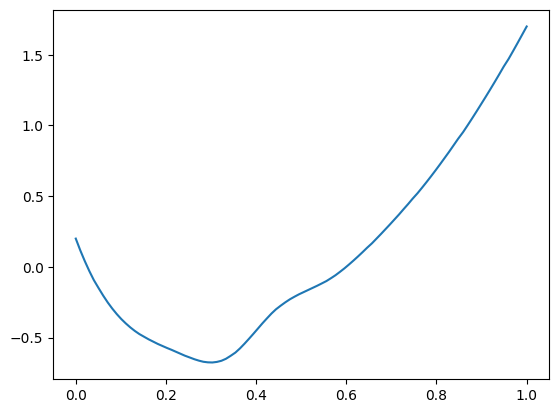

In [1]:
import matplotlib.pyplot as plt
from pwl_fit_data import x,y

plt.plot(x,y)

In [45]:
import numpy as np
import cvxpy as cp
from pwl_fit_data import x,y
#Parameter setup
K = 4
a = np.linspace(0,1,K)

alpha = cp.Variable(K)
beta = cp.Variable(K)

diag_x = np.diag(x)
m = diag_x.shape[0]

# Initialize F as a zero matrix of shape (m, K)
F = np.zeros((m, K))
zeros = np.zeros(K)

# Fill the matrix F based on the condition
for i in range(m):
    col = min(K-1, int(np.ceil(x[i] * K)) - 1)  # Ensure the column index is within bounds
    F[i, col] = 1
    
C_a_comp = np.c_[np.diag(a[1:-1]),np.zeros(K-2)] -np.diag(a[1:-1],1)[:-1]
C_b_comp = np.c_[np.eye(K-2),np.zeros(K-2)] -np.diag(np.ones(K-2),1)[:-1]
C = np.c_[C_a_comp, C_b_comp]

constraints = [
    C @ cp.concatenate([alpha[:-1], beta[:-1]],0) == np.zeros((K-1)*2),
    C_b_comp @ alpha[1:-1] <= np.zeros((K-1)*2)
]

obj = cp.Minimize(cp.norm2(diag_x @ F @ alpha + F @ beta - y))

problem = cp.Problem(obj, constraints)    


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

In [47]:
import numpy as np
import cvxpy as cp
from pwl_fit_data import x, y  # Replace with your actual x and y data

# Parameter setup
K = 4
a = np.linspace(0, 1, K)  # Breakpoints

# Define the optimization variables
alpha = cp.Variable(K)
beta = cp.Variable(K)

# Initialize m (number of data points)
m = len(x)

# Create the F matrix based on the condition
F = np.zeros((m, K))

for i in range(m):
    col = min(K - 1, int(np.ceil(x[i] * K)) - 1)  # Ensure the column index is within bounds
    F[i, col] = 1

# Create the constraint matrices C_a_comp and C_b_comp
C_a_comp = np.c_[np.diag(a[1:-1]), np.zeros(K - 2)] - np.diag(a[1:-1], 1)[:-1] if K > 2 else np.zeros((K - 1, K - 1))
C_b_comp = np.c_[np.eye(K - 2), np.zeros(K - 2)] - np.diag(np.ones(K - 2), 1)[:-1] if K > 2 else np.zeros((K - 1, K - 1))

# Stack them together to form the full matrix C
C = np.c_[C_a_comp, C_b_comp]

# Define the constraints
# Correcting the dimensions for the constraints
constraints = [
    C @ cp.concatenate([alpha[:-1], beta[:-1]]) == np.zeros((K - 1) * 2),  # Adjust the concatenation here
    C_b_comp @ alpha[1:-1] <= np.zeros(K - 2)
]

# Define the objective function
# Ensure diag_x is used correctly
# Assuming you want a diagonal matrix with x on the diagonal
diag_x = np.diag(x)  # Diagonal matrix with x values on the diagonal
obj = cp.Minimize(cp.norm2(diag_x @ F @ alpha + F @ beta - y))

# Define the optimization problem
problem = cp.Problem(obj, constraints)

# Solve the problem
problem.solve()

# Output the results
print("Optimal alpha: ", alpha.value)
print("Optimal beta: ", beta.value)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (6,).

In [37]:
cp.concatenate([alpha, beta],0)

Expression(AFFINE, UNKNOWN, (8,))